In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

In [2]:
def parse_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            label, text = line.split(' ', 1)
            label = int(label.replace('__label__', ''))
            data.append((label, text.strip()))
    return pd.DataFrame(data, columns=['label', 'text'])

In [3]:
train = parse_data(r'C:\Users\work\Documents\Kaggle\train\train.ft.txt')
# test = parse_data('test.ft.txt')

print("Train:")
train

Train:


,label,text
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3599995,1,Don't do it!!: The high chair looks great when...
3599996,1,"Looks nice, low functionality: I have used thi..."
3599997,1,"compact, but hard to clean: We have a small ho..."
3599998,1,what is it saying?: not sure what this book is...


In [4]:
df = train.copy()
df

,label,text
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3599995,1,Don't do it!!: The high chair looks great when...
3599996,1,"Looks nice, low functionality: I have used thi..."
3599997,1,"compact, but hard to clean: We have a small ho..."
3599998,1,what is it saying?: not sure what this book is...


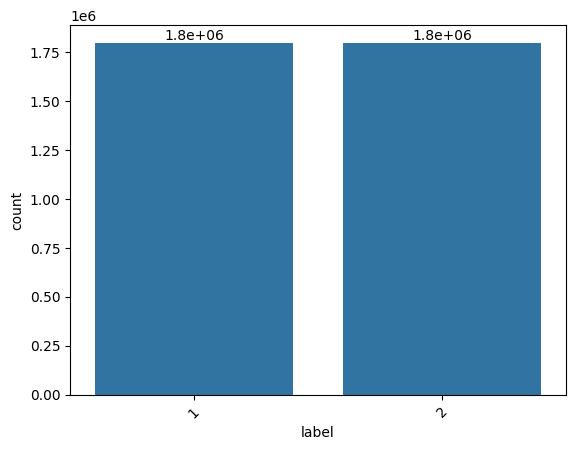

In [5]:
ax = sns.countplot(data =df, x = "label")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45);

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\work\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\work\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\work\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# Example text
text = "This is a sample sentence."

# Tokenize the text
tokens = word_tokenize(text)

# Print the tokens
print(tokens)

['This', 'is', 'a', 'sample', 'sentence', '.']


In [9]:
WordNetLemmatizer().lemmatize("children")

'child'

In [10]:
WordNetLemmatizer().lemmatize("runs", pos='v')  # 'v' is for verb , n=noun

'run'

In [13]:
stop_words = set(stopwords.words('english'))
words_to_remove = ["not", "no", "never", "neither", "nor", "very", 
                   "really", "too", "extremely", "quite", "but", "however", 
                   "although", "though", "if", "unless", "except"]

stop_words = [word for word in stop_words if word not in words_to_remove]

def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")    # ignoring ' as in don't 
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)


In [14]:
df["text"] = df["text"].apply(cleaning) 
df

,label,text
0,2,stuning even sound track beautiful paint sener...
1,2,best soundtrack ever anything im reading lot r...
2,2,amazing soundtrack favorite music time hand in...
3,2,excellent soundtrack truly like soundtrack enj...
4,2,remember pull jaw floor hearing if youve playe...
...,...,...
3599995,1,dont high chair look great first come box but ...
3599996,1,look nice low functionality used highchair kid...
3599997,1,compact but hard clean small house really want...
3599998,1,saying not sure book supposed really rehash ve...


In [15]:
df.to_csv('amazon_reviews_train_clean.csv', index=False)

In [3]:
df = pd.read_csv(r"C:\Users\work\Documents\Kaggle\train\amazon_reviews_train_clean.csv")  # read kaggle cleaned data
df

,label,text
0,2,stuning even sound track beautiful paint sener...
1,2,best soundtrack ever anything im reading lot r...
2,2,amazing soundtrack favorite music time hand in...
3,2,excellent soundtrack truly like soundtrack enj...
4,2,remember pull jaw floor hearing if youve playe...
...,...,...
3599995,1,dont high chair look great first come box but ...
3599996,1,look nice low functionality used highchair kid...
3599997,1,compact but hard clean small house really want...
3599998,1,saying not sure book supposed really rehash ve...


In [4]:
df.isna().sum()

label     0
text     13
dtype: int64

In [5]:
df['text'].fillna("", inplace=True)
df.isna().sum()

label    0
text     0
dtype: int64

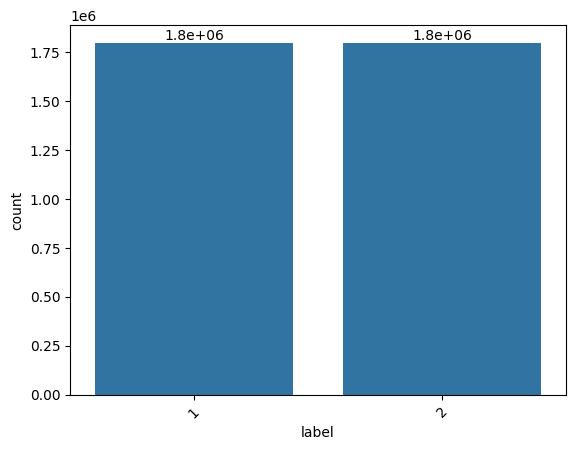

In [6]:
import seaborn as sns
ax = sns.countplot(data =df, x = "label")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45);

In [7]:
df.head()

,label,text
0,2,stuning even sound track beautiful paint sener...
1,2,best soundtrack ever anything im reading lot r...
2,2,amazing soundtrack favorite music time hand in...
3,2,excellent soundtrack truly like soundtrack enj...
4,2,remember pull jaw floor hearing if youve playe...
